In [1]:
# Imports the print function from newer versions of python
from __future__ import print_function

# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time

# The skimage is used for the image processing tasks
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline

# Image Manipulation

In this part,you have several tasks to be implemented

- Load image_1 and display the image
- Resize the image or crop the image
- Point operator - change the color on pixels
- Histogram equalization 


You need to complete the function/code  when you see "YOUR CODE"

### 1. Load an image and display it

Implement the function "load" to load image and the function "display" to plot the image

In [2]:

image1_path = './image1.jpg'

#YOUR CODE#
def load(image_path):
    """
    Load image1.jpg by using the function matplotlib.pyplot 
    """
    #Implement your code here and return a Numpy data type
    img = plt.imread(image_path)
    return img

#YOUR CODE#
def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

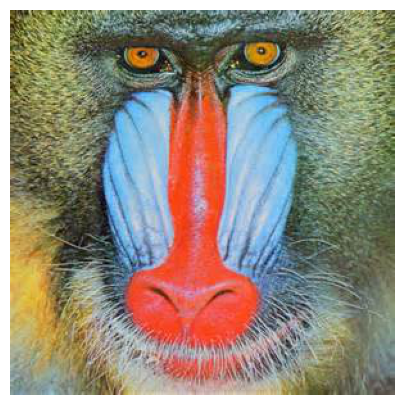

In [3]:
img = load(image1_path)
display(img)

Get the height and width (the size) of the image

In [4]:
#YOUR CODE#
img.shape

(300, 300, 3)

### 2. Crop the image

Implement the crop_image() method by taking in the starting row index, starting column index, number of rows, and number of columns, and outputting the cropped image.

Then, in the cell below, see if you can pull out a 100x100 square from each corner of the original image1: the top left, top right, bottom left, and bottom right.

In [12]:
#YOUR CODE HERE
def crop_image(img,row_idx,col_idx,num_rows,num_cols):
    img_crop = img[row_idx:row_idx + num_rows, col_idx:col_idx+num_cols,:]
    return img_crop
    

In [15]:
img_crop = crop_image(img,2,3,20,50)

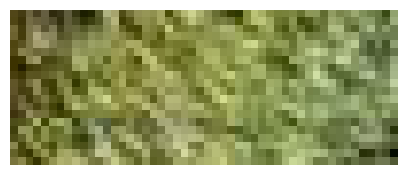

In [16]:
#Display the cropped image
display(img_crop)

### 3. Convert RGB color to HSV

Now you will try to convert RGB color of an image to HSV (Hue, Saturation, Value)(hint:using)

In [17]:
#you can get a image from the skimage.data 
rgb_img = data.coffee()

##YOUR CODE###
##Convert RGB to HSV
hsv_img = rgb2hsv(rgb_img)

#assign to a new variable for the following usage
hsv_img_new = hsv_img

hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
sat_img = hsv_img[:, :, 1]


In [ ]:
#Using the "display" function to display the RGB imge 

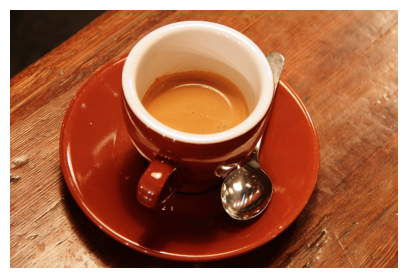

In [19]:
display(rgb_img)

Now, display the "Hue" and "value" channel.


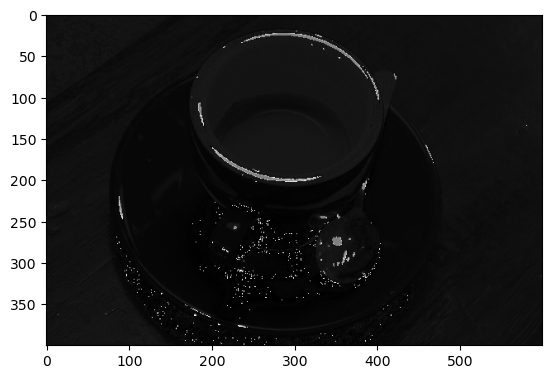

In [26]:
#YOUR CODE#

#display(hue_img)
plt.imshow(hue_img, cmap="gray")

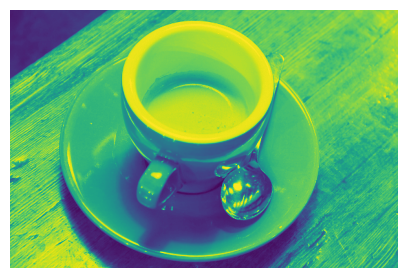

In [27]:
#YOUR CODE#
display(value_img)

In [33]:
#YOUR CODE#
# Change the "V"channel by a factor of 2, making the image brighter 
hsv_img_new[:, :, 2] = hsv_img[:, :, 2]*2

In [34]:
#YOUR CODE#
# Convert the hsv_img_new from "HSV" to "RBG" 
rbg_new = hsv2rgb(hsv_img_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


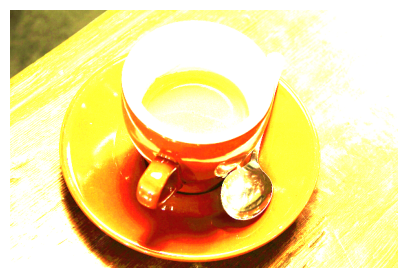

In [35]:
# YOUR CODE #
# Display the new image "rbg_new "
display(rbg_new)

You can also try to change the channel "Saturate" and "value", and then see the results

### 4. Plot the  histogram of the image and perform histogram equalization 

Implement the function of "hist_display" to display the histogram of the image

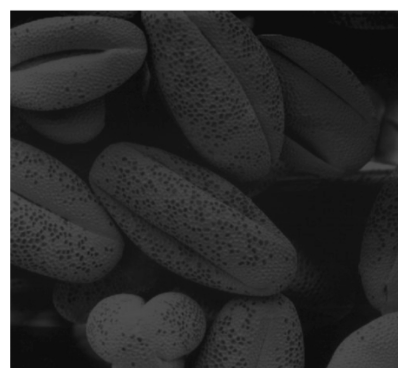

In [13]:
image3_path = './image3.png'
img = load(image3_path)
display(img)

Now your task is to perform equalization on the above image, the expected result is as below:
 ![Object](./image3_result.png)

In [22]:
#YOUR CODE#
## Check the range of image values


the pixel values are stored as 8-bit integer numbers that can take values in the range 0-255. However, pixel values may also be stored with other types and ranges. For example, some scikit-image functions return the pixel values as floating point numbers in the range 0-1. The type and range of the pixel values are important for the colorscale when plotting, and for masking and thresholding images as we will see later in the lesson. If you are unsure about the type of the pixel values, you can inspect it with print(image.dtype). For the example above, you should find that it is dtype('uint8') indicating 8-bit integer numbers or float32 float number

you can convert float32 [0,1] to integer number [0,255]

In [20]:
img *= 255
img = img.astype(int)

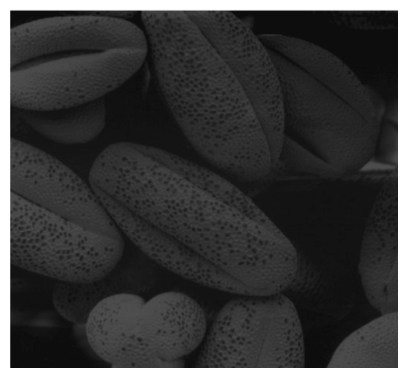

In [21]:
display(img)

(array([  1788.,      0.,  41172.,  85290.,  38862.,  32037.,  43203.,
         55797.,  47859.,  61332.,  58524.,  30201.,  25153.,  17433.,
         15195.,   1776.,    446.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    412.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        183752.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

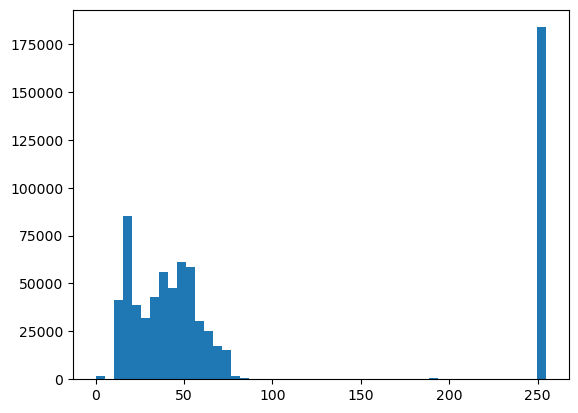

In [24]:
##YOUR CODE##
##Plot the histogram

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

We have our histogram, and we can take the next step towards equalization by computing the cumulative sum of the histogram

In [49]:
#YOUR CODE ##
# calculate and plot the cumulative sum of the histogram #
#Hint:using numpy library
hist, _ = np.histogram(flat, 256, [0, 255])
cdf = numpy.cumsum(hist) #YOUR CODE

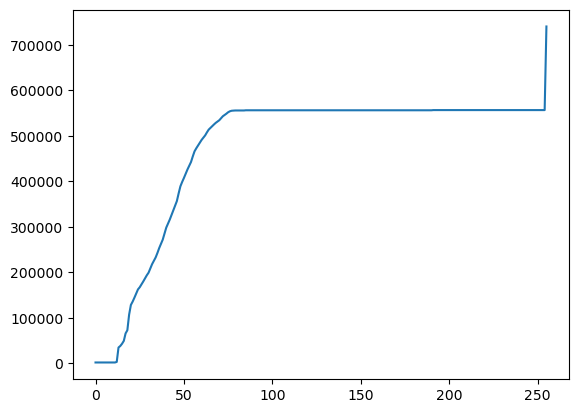

In [50]:
#plot the cumulative sum of the histogram
plt.plot(cdf)

In [51]:
##Normalise the Normalize the cumulative sum distribution between 0 and 255
cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

In [56]:
# Map the intensities of the cumulative sum into the image
result = cdf_normalized[img.flatten()]

#Reshape the array to the orignal image shape
result  = np.reshape(result, img.shape)

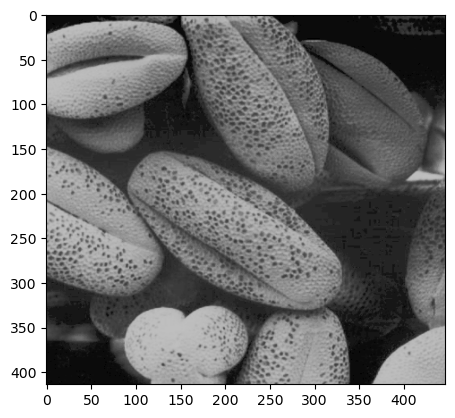

In [60]:
#Plot the result remember that you need to convert the float data type to integer type if the range is [0, 255]
plt.imshow(result.astype(np.uint8))

### 5. Image Matting  (Homework)

Your task is to extract the object of the first image and add the back ground of second image. The result should look like the third image


 ![Object](./matting_img1.jpeg)
 
 ![Background](./matting_img2.jpeg)
 
  ![Background](./matting_img3.jpeg)